# DebtRank using Renormalizable model

## Generating networks with RM

In [7]:
import igraph as ig
import numpy as np
from src import renormalizable_model

#### Testing

In [8]:
strenghts = [(1,1), (0,1), (0,0), (50, 50)]
n=len(strenghts)
g1 = renormalizable_model.create_RM_graph(strenghts, z=0)
g2 = renormalizable_model.create_RM_graph(strenghts, z=1)
g3 = renormalizable_model.create_RM_graph(strenghts, z=np.infty)

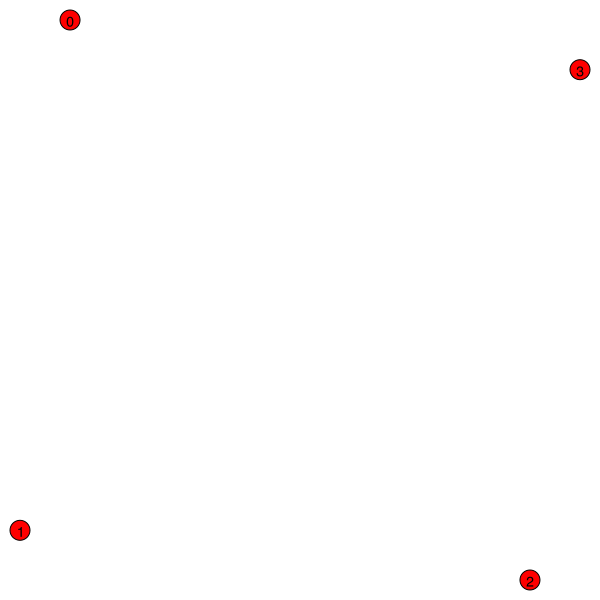

In [9]:
ig.plot(g1, vertex_label=range(n))

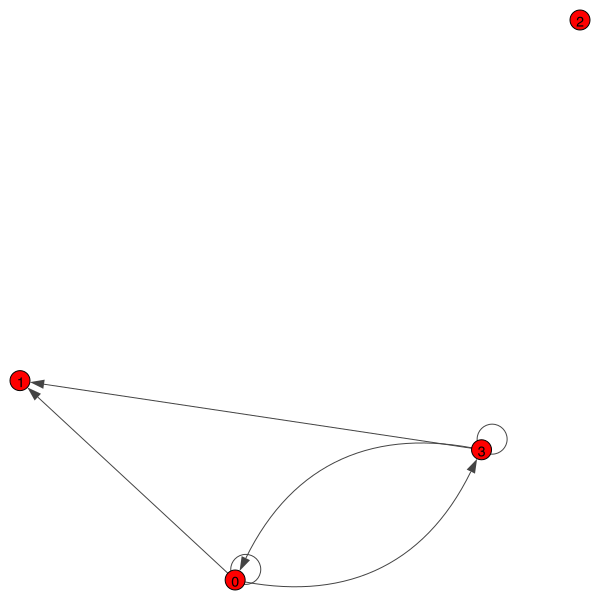

In [10]:
ig.plot(g2, vertex_label=range(n))

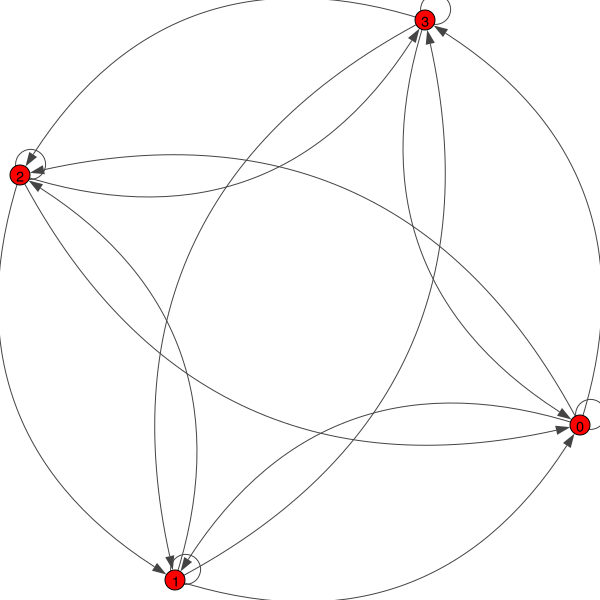

In [11]:
ig.plot(g3, vertex_label=range(n))

In [12]:
g4 = renormalizable_model.create_RM_graph(strenghts, z=1, weighted=True)

Exception: Inconsistent weights

In [ ]:
strenghts_2 = [(1,1), (2,0), (0, 50), (50, 2)]
g5 = renormalizable_model.create_RM_graph(strenghts_2, z=1, weighted=True)

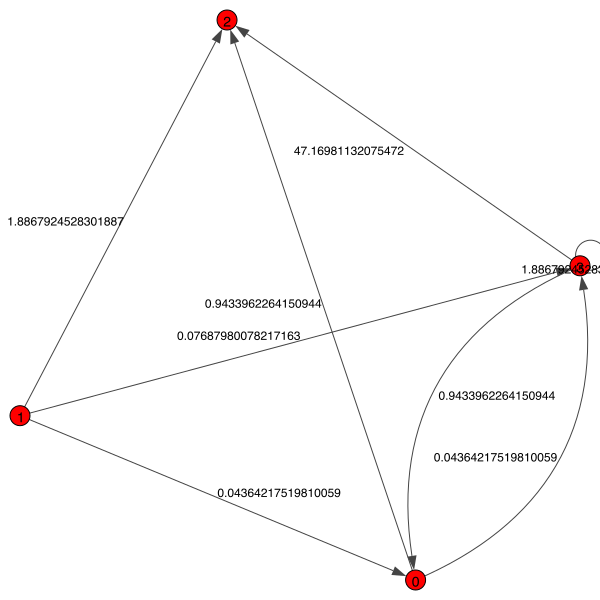

In [ ]:
ig.plot(g5, vertex_label=range(n), edge_label = g5.es["weight"])

In [ ]:
strenghts_2 = [(1,1), (2,0), (0, 50), (50, 2)]
g6 = renormalizable_model.create_RM_graph(strenghts_2, z=np.infty, weighted=True)

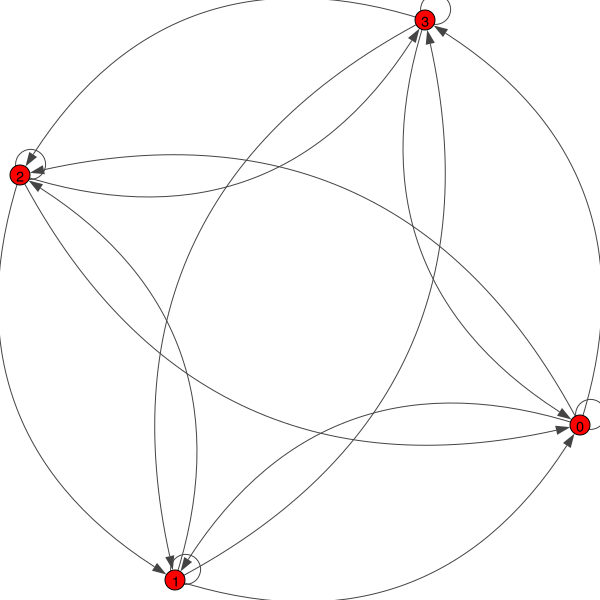

In [ ]:
ig.plot(g6, vertex_label=range(n))

## Coarse graining

#### Merging nodes

In [ ]:
from src import coarse_graining

In [ ]:
g = ig.Graph(5, [(0,1), (0,2), (1,2), (1,3), (4,2), (0,4)], directed=True)
g.es["weight"] = [1,2,3,4,5,6]

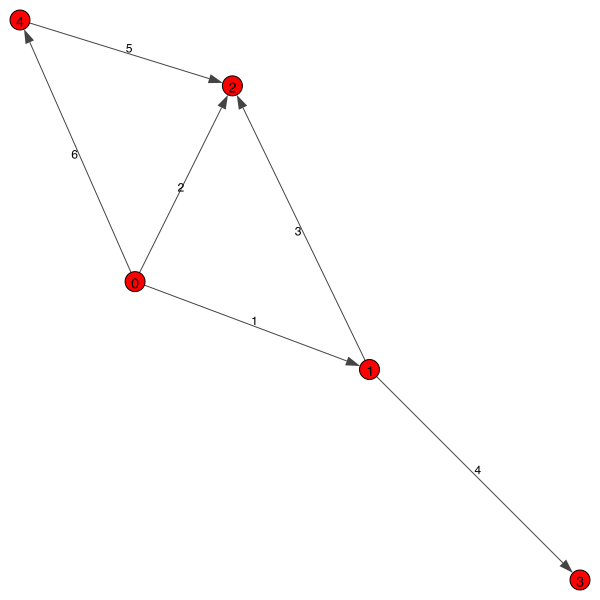

In [ ]:
ig.plot(g, vertex_label=g.vs.indices, edge_label = g.es["weight"])

In [ ]:
group_sequence = coarse_graining.divide_graph_equally(g, 2)
print(group_sequence)
g_coarse_grained = coarse_graining.coarse_grain_weighted_graph(g, group_sequence)

[array([0, 1, 2]), array([3, 4])]


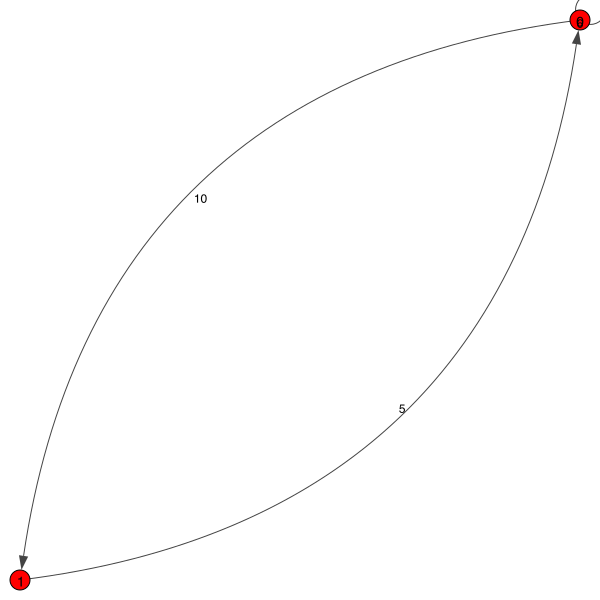

In [ ]:
ig.plot(g_coarse_grained, vertex_label=g_coarse_grained.vs.indices, edge_label = g_coarse_grained.es["weight"])

In [ ]:
group_sequence = coarse_graining.merge_n_group(g, int(len(g.vs.indices)/2))
print(group_sequence)
g_coarse_grained2 = coarse_graining.coarse_grain_weighted_graph(g, group_sequence)

[[0, 1], [2], [3], [4]]


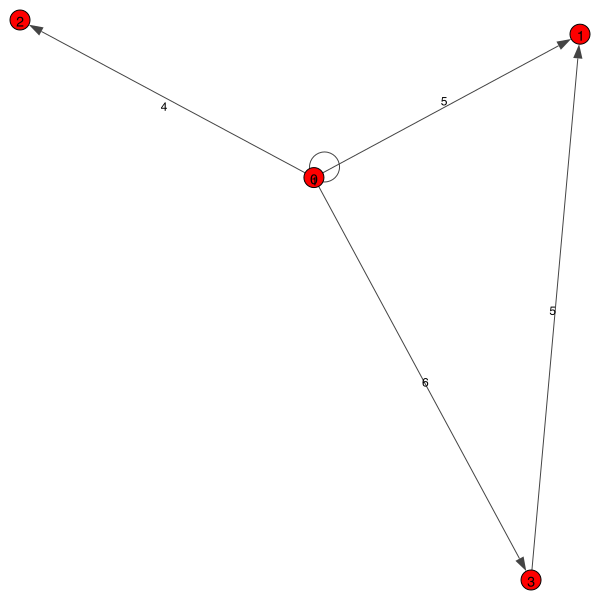

In [ ]:
ig.plot(g_coarse_grained2, vertex_label=g_coarse_grained2.vs.indices, edge_label = g_coarse_grained2.es["weight"])

## Network properties

In [ ]:
from src import network_properties
from matplotlib import pyplot as plt

In [ ]:
sigma = 2.28
mu = -(sigma**2)/2
#strenghts = renormalizable_model.make_strenghts_consistent(np.random.lognormal(mean=mu, sigma=sigma, size=[500,2]))
gen_strenghts = np.random.lognormal(mean=mu, sigma=sigma, size=500)
strenghts = np.stack([gen_strenghts, gen_strenghts], axis=1)
z = 1

In [ ]:
graph = renormalizable_model.create_RM_graph(strenghts, z, weighted=True)

### Clustering coefficient

/Volumes/Datový disk/FJFI/Leiden/Research/Renormalization-Network-Reconstruction/src/network_properties.py:32: RuntimeWarning: invalid value encountered in divide
  clustering_coeff_k = clustering_coeff_k/degree_hist


Text(0, 0.5, '$\\overline{C}(k)$')

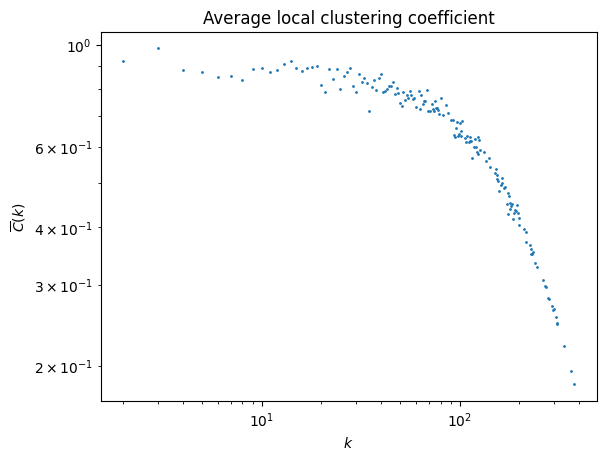

In [ ]:
_, c_k = network_properties.clustering_coeff(graph)
plt.scatter(range(1, len(c_k)+1), c_k, s=1)
plt.xscale('log')
plt.yscale('log')
plt.title('Average local clustering coefficient')
plt.xlabel(r'$k$')
plt.ylabel(r'$\overline{C}(k)$')

### Average nearest neighbor degree

Text(0, 0.5, '$\\overline{k^{nn}}(k)$')

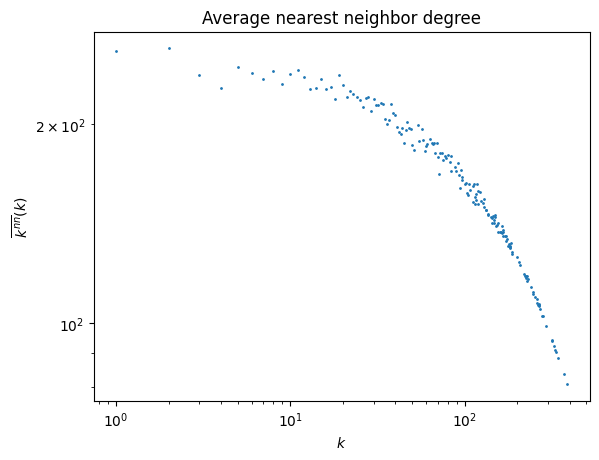

In [ ]:
_, annd_k = network_properties.annd(graph, mode='all')
plt.scatter(range(1, len(annd_k)+1), annd_k, s=1)
plt.xscale('log')
plt.yscale('log')
plt.title('Average nearest neighbor degree')
plt.xlabel(r'$k$')
plt.ylabel(r'$\overline{k^{nn}}(k)$')

Text(0, 0.5, '$\\overline{k^{nn}_{out}}(k_{out})$')

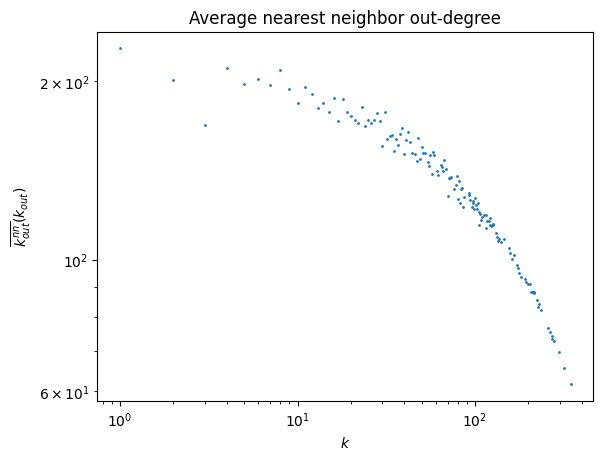

In [ ]:
from matplotlib import pyplot as plt
_, annd_k_out = network_properties.annd(graph, mode='out')
plt.scatter(range(1, len(annd_k_out)+1), annd_k_out, s=1)
plt.xscale('log')
plt.yscale('log')
plt.title('Average nearest neighbor out-degree')
plt.xlabel(r'$k$')
plt.ylabel(r'$\overline{k^{nn}_{out}}(k_{out})$')

Text(0, 0.5, '$\\overline{k^{nn}_{in}}(k_{in})$')

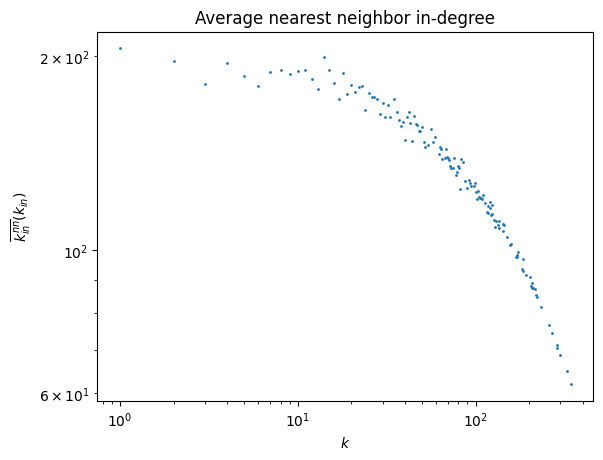

In [ ]:
from matplotlib import pyplot as plt
_, annd_k_in = network_properties.annd(graph, mode='in')
plt.scatter(range(1, len(annd_k_in)+1), annd_k_in, s=1)
plt.xscale('log')
plt.yscale('log')
plt.title('Average nearest neighbor in-degree')
plt.xlabel(r'$k$')
plt.ylabel(r'$\overline{k^{nn}_{in}}(k_{in})$')

## DebtRank